In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import seaborn as sb
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import os, datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [4]:
train = pd.read_csv ("train.csv")
test = pd.read_csv ("test.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


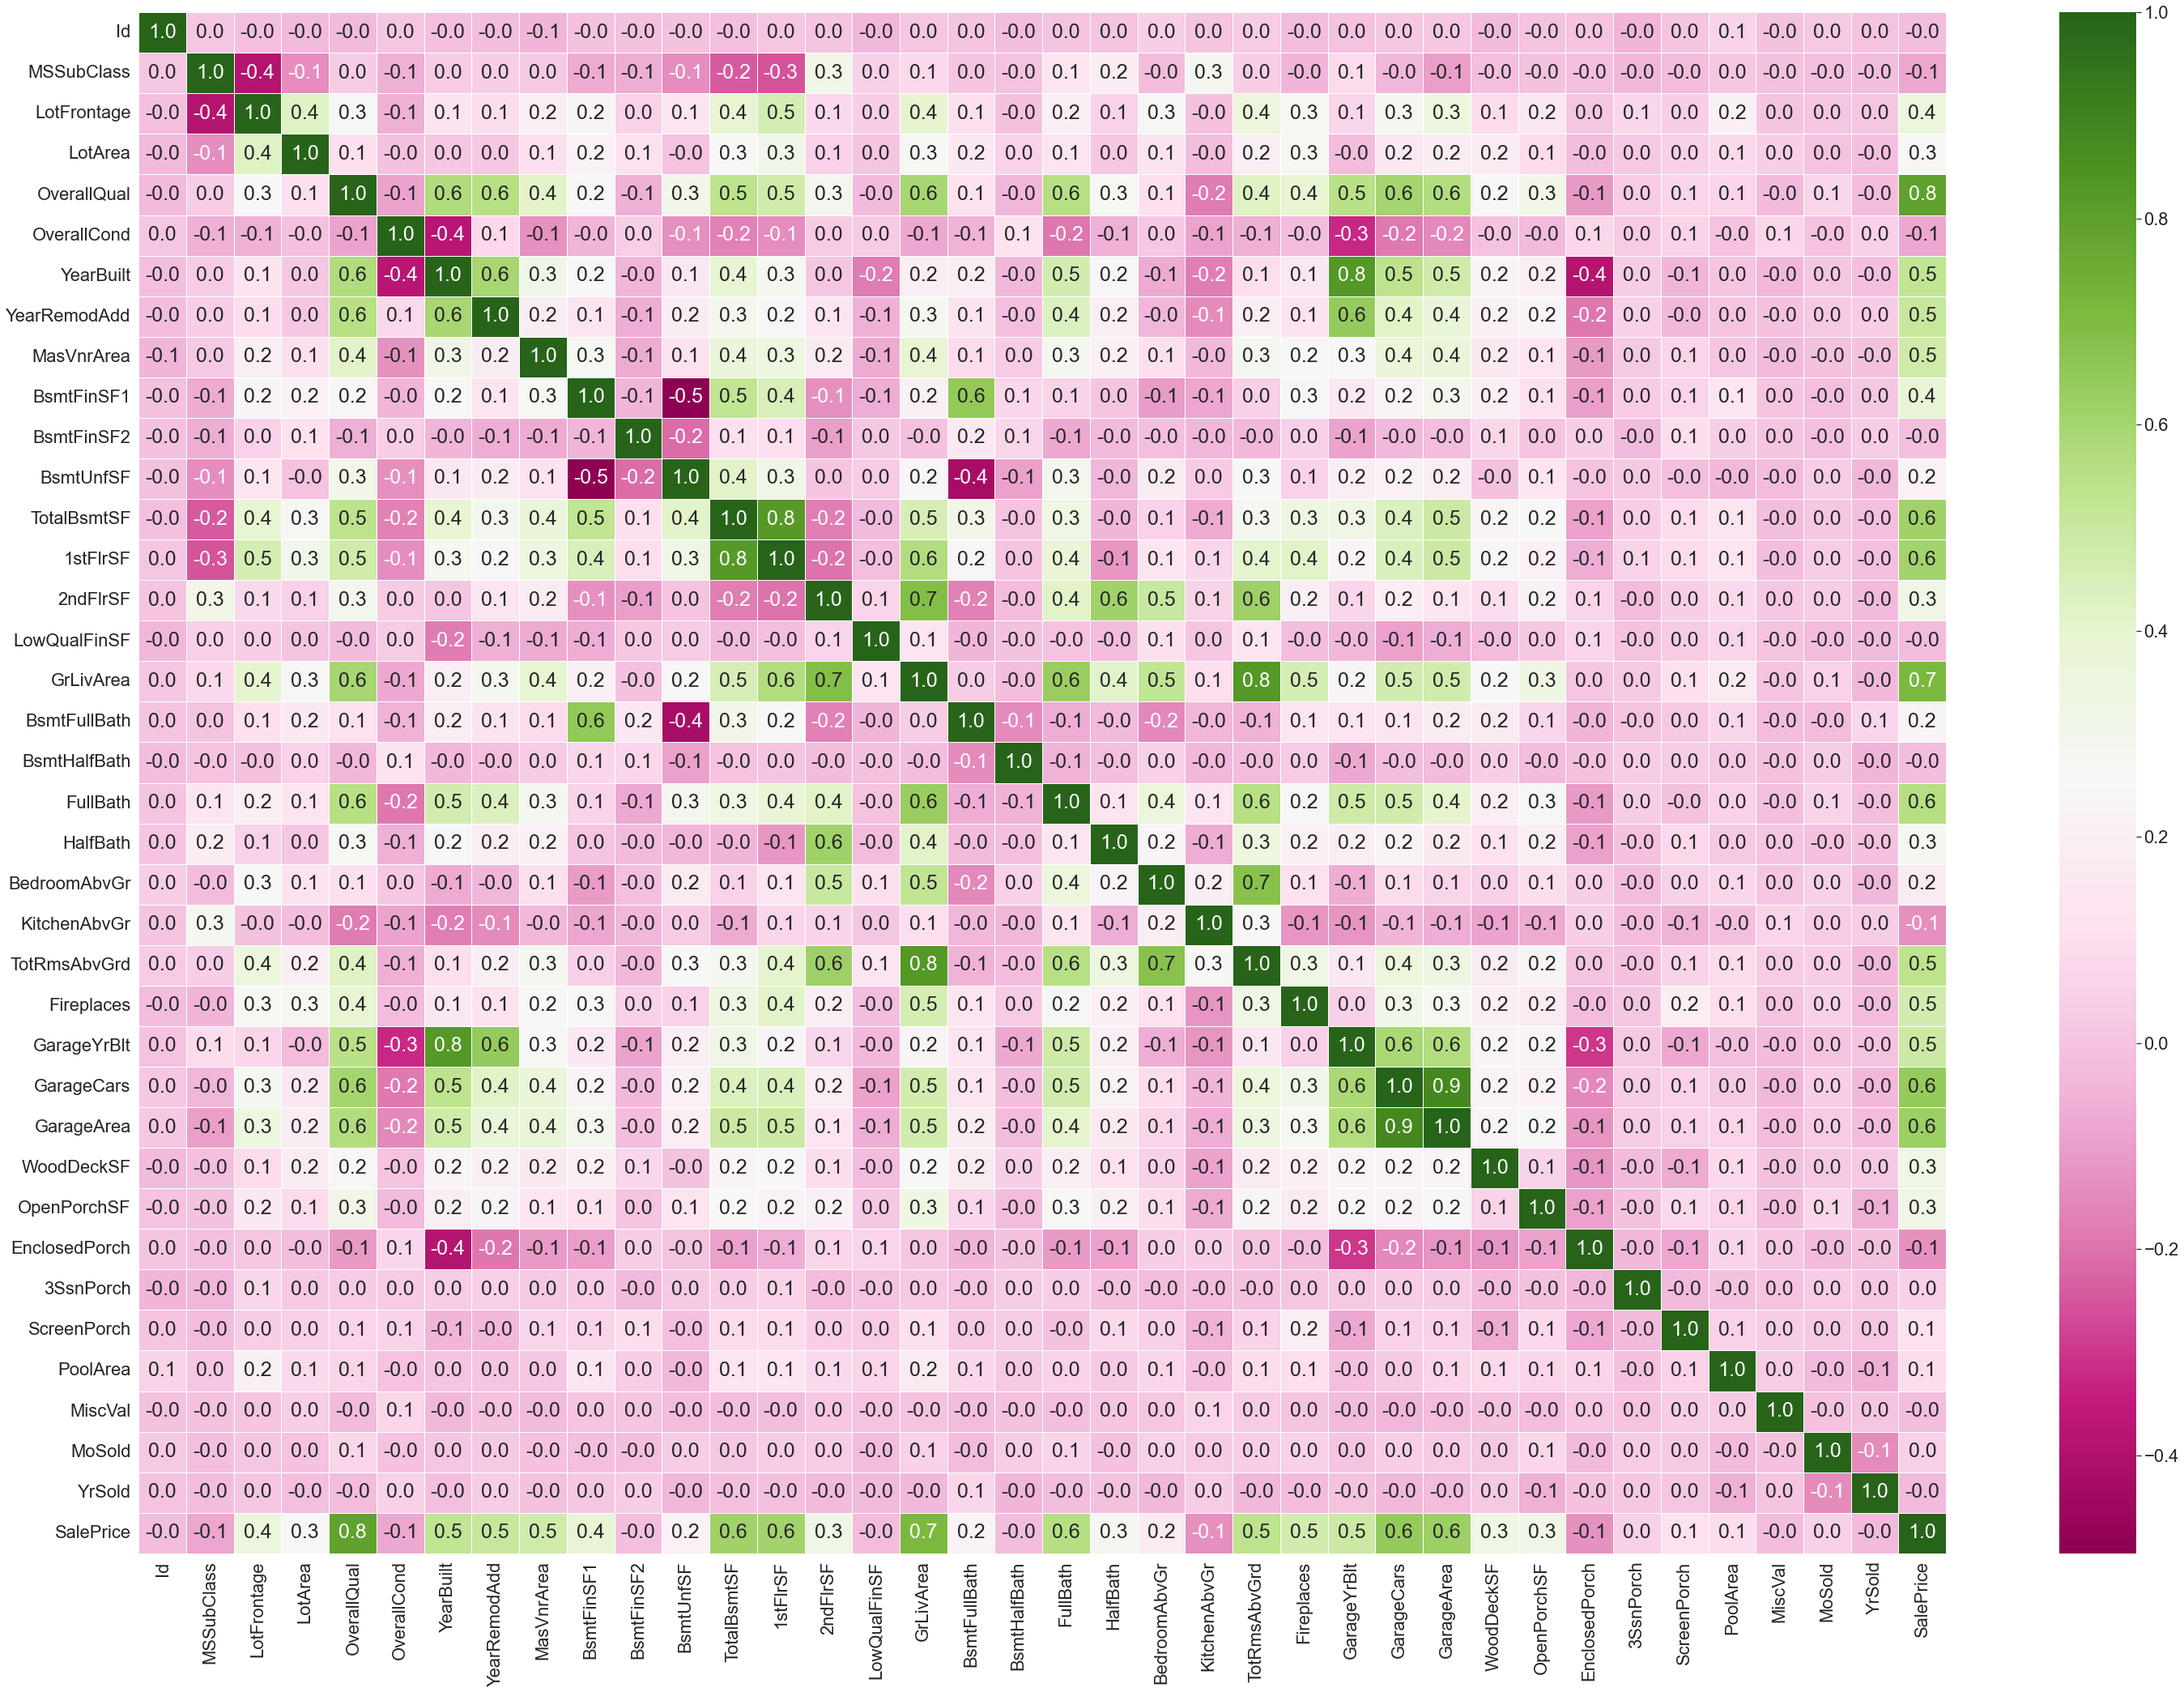

In [7]:
correlation_train=train.corr()
sb.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sb.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

In [8]:
correlation_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<0.8)) | (value<=-0.1):
        important_columns.append(key)
important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr']

In [10]:
train_test=pd.concat([train,test],axis=0,sort=False)
train_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [11]:
pd.set_option('display.max_rows', 5000)
train_test_null_info=pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_tes_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_tes_info

,Count of NaN,DataTypes
Id,0,int64
MSSubClass,0,int64
MSZoning,4,object
LotFrontage,486,float64
LotArea,0,int64
Street,0,object
Alley,2721,object
LotShape,0,object
LandContour,0,object
Utilities,2,object


In [12]:
train_test.loc[train_test['Fireplaces']==0,'FireplaceQu']='Nothing'
train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train_test.groupby('1stFlrSF')['LotFrontage'].transform('mean'))
train_test['LotFrontage'].interpolate(method='linear',inplace=True)
train_test['LotFrontage']=train_test['LotFrontage'].astype(int)
train_test['MasVnrArea'] = train_test['MasVnrArea'].fillna(train_test.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
train_test['MasVnrArea'].interpolate(method='linear',inplace=True)
train_test['MasVnrArea']=train_test['MasVnrArea'].astype(int)
train_test["Fence"] = train_test["Fence"].fillna("None")
train_test["FireplaceQu"] = train_test["FireplaceQu"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["MiscFeature"] = train_test["MiscFeature"].fillna("None")
train_test.loc[train_test['BsmtFinSF1']==0,'BsmtFinType1']='Unf'
train_test.loc[train_test['BsmtFinSF2']==0,'BsmtQual']='TA'
train_test['YrBltRmd']=train_test['YearBuilt']+train_test['YearRemodAdd']
train_test['Total_Square_Feet'] = (train_test['BsmtFinSF1'] + train_test['BsmtFinSF2'] + train_test['1stFlrSF'] + train_test['2ndFlrSF'] + train_test['TotalBsmtSF'])
train_test['Total_Bath'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) + train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))
train_test['Total_Porch_Area'] = (train_test['OpenPorchSF'] + train_test['3SsnPorch'] + train_test['EnclosedPorch'] + train_test['ScreenPorch'] + train_test['WoodDeckSF'])
train_test['exists_pool'] = train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_garage'] = train_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_fireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_bsmt'] = train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['old_house'] = train_test['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)

for i in train_test.columns:
    if 'SalePrice' not in i:
        if 'object' in str(train_test[str(i)].dtype):
            train_test[str(i)]=train_test[str(i)].fillna(method='ffill')

In [13]:
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'YrSold', 'MoSold', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')

for col in columns:
    lbl_enc = LabelEncoder() 
    lbl_enc.fit(list(train_test[col].values)) 
    train_test[col] = lbl_enc.transform(list(train_test[col].values))

In [14]:
numeric_features = train_test.dtypes[train_test.dtypes != "object"].index
skewed_features = train_test[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)

MiscVal              21.947195
PoolArea             16.898328
exists_pool          14.884318
LotArea              12.822431
LowQualFinSF         12.088761
3SsnPorch            11.376065
LandSlope             4.975157
KitchenAbvGr          4.302254
EnclosedPorch         4.003891
ScreenPorch           3.946694
MasVnrArea            2.600375
OpenPorchSF           2.535114
WoodDeckSF            1.842433
LotFrontage           1.483631
1stFlrSF              1.469604
Total_Porch_Area      1.376649
GrLivArea             1.269358
2ndFlrSF              0.861675
TotRmsAbvGrd          0.758367
MSSubClass            0.738722
Fireplaces            0.733495
HalfBath              0.694566
OverallCond           0.570312
HeatingQC             0.486656
FireplaceQu           0.333787
BedroomAbvGr          0.326324
OverallQual           0.197110
MoSold                0.195884
FullBath              0.167606
YrSold                0.132399
Id                    0.000000
exists_fireplace     -0.054148
BsmtFinT

In [15]:
high_skewness = skewed_features[abs(skewed_features) > 0.9]
skewed_features = high_skewness.index
print(high_skewness)
print('\nVariables with high skewness: \n\n',skewed_features)

MiscVal             21.947195
PoolArea            16.898328
exists_pool         14.884318
LotArea             12.822431
LowQualFinSF        12.088761
3SsnPorch           11.376065
LandSlope            4.975157
KitchenAbvGr         4.302254
EnclosedPorch        4.003891
ScreenPorch          3.946694
MasVnrArea           2.600375
OpenPorchSF          2.535114
WoodDeckSF           1.842433
LotFrontage          1.483631
1stFlrSF             1.469604
Total_Porch_Area     1.376649
GrLivArea            1.269358
BsmtExposure        -1.176341
KitchenQual         -1.448023
ExterQual           -1.801409
Fence               -1.993777
ExterCond           -2.497719
PavedDrive          -2.979084
BsmtCond            -3.301446
BsmtFinType2        -3.412861
CentralAir          -3.459022
GarageQual          -3.919880
exists_garage       -3.941054
Functional          -4.055757
GarageCond          -5.147262
exists_bsmt         -5.828995
BsmtQual            -6.303596
Street             -15.500133
PoolQC    

In [16]:
train_test[['MiscVal', 'PoolArea', 'exists_pool', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'EnclosedPorch',
       'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'Total_Porch_Area', 'GrLivArea', 'BsmtExposure',
       'KitchenQual', 'ExterQual', 'Fence', 'ExterCond', 'PavedDrive', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'GarageQual', 'exists_garage',
       'Functional', 'GarageCond', 'exists_bsmt', 'BsmtQual', 'Street','PoolQC']].head()

,MiscVal,PoolArea,exists_pool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,EnclosedPorch,ScreenPorch,...,BsmtFinType2,CentralAir,GarageQual,exists_garage,Functional,GarageCond,exists_bsmt,BsmtQual,Street,PoolQC
0,0,0,0,8450,0,0,0,1,0,0,...,5,1,4,1,6,4,1,3,1,3
1,0,0,0,9600,0,0,0,1,0,0,...,5,1,4,1,6,4,1,3,1,3
2,0,0,0,11250,0,0,0,1,0,0,...,5,1,4,1,6,4,1,3,1,3
3,0,0,0,9550,0,0,0,1,272,0,...,5,1,4,1,6,4,1,3,1,3
4,0,0,0,14260,0,0,0,1,0,0,...,5,1,4,1,6,4,1,3,1,3


In [17]:
for feature in skewed_features:
    train_test[feature] = boxcox1p(train_test[feature], boxcox_normmax(train_test[feature] + 1))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4098: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [18]:
train_test[['MiscVal', 'PoolArea', 'exists_pool', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'EnclosedPorch',
       'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'Total_Porch_Area', 'GrLivArea', 'BsmtExposure',
       'KitchenQual', 'ExterQual', 'Fence', 'ExterCond', 'PavedDrive', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'GarageQual', 'exists_garage',
       'Functional', 'GarageCond', 'exists_bsmt', 'BsmtQual', 'Street','PoolQC']].head()

,MiscVal,PoolArea,exists_pool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,EnclosedPorch,ScreenPorch,...,BsmtFinType2,CentralAir,GarageQual,exists_garage,Functional,GarageCond,exists_bsmt,BsmtQual,Street,PoolQC
0,0.0,0.0,0.0,13.424522,0.0,0.0,0.0,0.75096,0.000000,0.0,...,1444.251693,46.910889,23.441187,1.502013,30.831,2952.403348,4.73925,54.556498,5.271674,3975.420489
1,0.0,0.0,0.0,13.694528,0.0,0.0,0.0,0.75096,0.000000,0.0,...,1444.251693,46.910889,23.441187,1.502013,30.831,2952.403348,4.73925,54.556498,5.271674,3975.420489
2,0.0,0.0,0.0,14.034135,0.0,0.0,0.0,0.75096,0.000000,0.0,...,1444.251693,46.910889,23.441187,1.502013,30.831,2952.403348,4.73925,54.556498,5.271674,3975.420489
3,0.0,0.0,0.0,13.683422,0.0,0.0,0.0,0.75096,16.012023,0.0,...,1444.251693,46.910889,23.441187,1.502013,30.831,2952.403348,4.73925,54.556498,5.271674,3975.420489
4,0.0,0.0,0.0,14.550144,0.0,0.0,0.0,0.75096,0.000000,0.0,...,1444.251693,46.910889,23.441187,1.502013,30.831,2952.403348,4.73925,54.556498,5.271674,3975.420489


In [19]:
train_test=pd.get_dummies(train_test,dtype='int8')

In [20]:
train_test_null_info=pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_test_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_test_info

,Count of NaN,DataTypes
Id,0,int64
MSSubClass,0,int64
LotFrontage,0,float64
LotArea,0,float64
Street,0,float64
Alley,0,int32
LotShape,0,int32
LandSlope,0,float64
OverallQual,0,int64
OverallCond,0,int64


In [21]:
train=train_test[0:1460]
test=train_test[1460:2919]


In [22]:
len(train)
train.interpolate(method='linear',inplace=True)
test.interpolate(method='linear',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14696\2007854917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.interpolate(method='linear',inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14696\2007854917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.interpolate(method='linear',inplace=True)


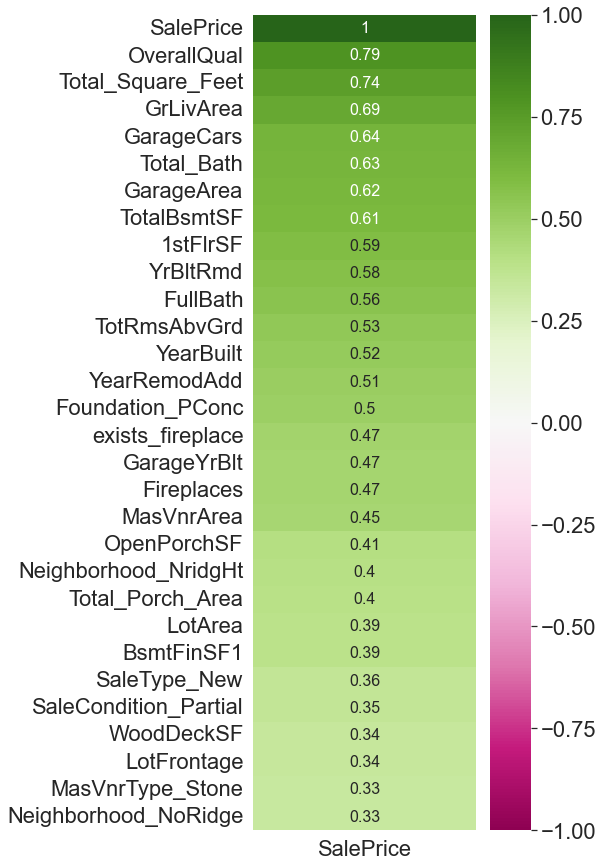

In [23]:
corr_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [24]:
corr_dict2=corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()
corr_dict2

{'SalePrice': 1.0,
 'OverallQual': 0.7909816005838053,
 'Total_Square_Feet': 0.7378811939482359,
 'GrLivArea': 0.6948427986322457,
 'GarageCars': 0.6404091972583519,
 'Total_Bath': 0.631731067931988,
 'GarageArea': 0.6234314389183622,
 'TotalBsmtSF': 0.6135805515591943,
 '1stFlrSF': 0.5885261462134701,
 'YrBltRmd': 0.5761444313502826,
 'FullBath': 0.5606637627484453,
 'TotRmsAbvGrd': 0.5337231555820284,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113866,
 'Foundation_PConc': 0.4977337525869374,
 'exists_fireplace': 0.4719080685164944,
 'GarageYrBlt': 0.46729002276453935,
 'Fireplaces': 0.46692883675152763,
 'MasVnrArea': 0.4549307986694848,
 'OpenPorchSF': 0.4065358659279445,
 'Neighborhood_NridgHt': 0.4021485981752677,
 'Total_Porch_Area': 0.39516894251207807,
 'LotArea': 0.3906209688146473,
 'BsmtFinSF1': 0.3864198062421535,
 'SaleType_New': 0.35750940508319323,
 'SaleCondition_Partial': 0.3520598546714349,
 'WoodDeckSF': 0.3376558488487925,
 'LotFrontage': 0.33701

In [25]:
best_columns=[]
for key,value in corr_dict2.items():
    if ((value>=0.3175) & (value<0.9)) | (value<=-0.315):
        best_columns.append(key)
best_columns

['OverallQual',
 'Total_Square_Feet',
 'GrLivArea',
 'GarageCars',
 'Total_Bath',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YrBltRmd',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Foundation_PConc',
 'exists_fireplace',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'OpenPorchSF',
 'Neighborhood_NridgHt',
 'Total_Porch_Area',
 'LotArea',
 'BsmtFinSF1',
 'SaleType_New',
 'SaleCondition_Partial',
 'WoodDeckSF',
 'LotFrontage',
 'MasVnrType_Stone',
 'Neighborhood_NoRidge',
 '2ndFlrSF',
 'Foundation_CBlock',
 'MasVnrType_None',
 'GarageType_Detchd',
 'HeatingQC',
 'GarageFinish',
 'old_house',
 'KitchenQual',
 'ExterQual']

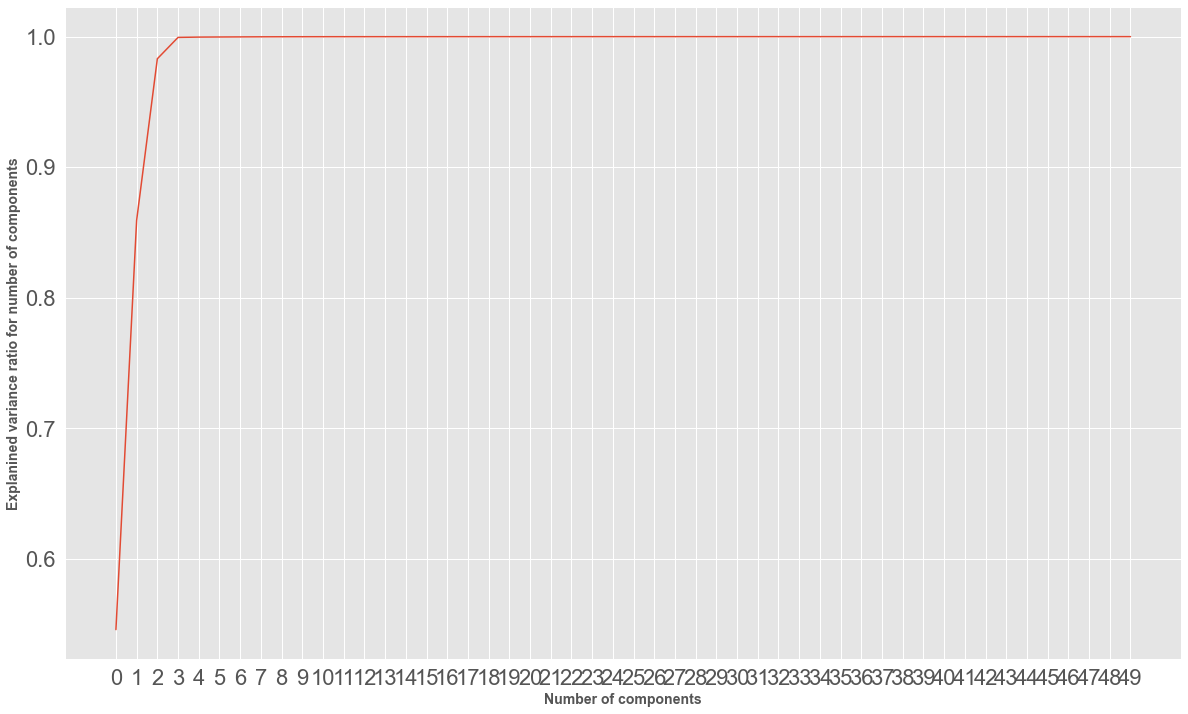

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(20,12))
rbst_scaler=RobustScaler()
train_rbst=rbst_scaler.fit_transform(train)

pca=PCA(50).fit(train_rbst)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xticks(np.arange(0, 50, 1))
plt.xlabel('Number of components',fontweight='bold',size=14)
plt.ylabel('Explanined variance ratio for number of components',fontweight='bold',size=14)

train_pca=PCA(3).fit_transform(train_rbst)

In [27]:
print(len(best_columns))

38


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38]),
 [Text(1, 0, 'OverallQual'),
  Text(2, 0, 'Total_Square_Feet'),
  Text(3, 0, 'GrLivArea'),
  Text(4, 0, 'GarageCars'),
  Text(5, 0, 'Total_Bath'),
  Text(6, 0, 'GarageArea'),
  Text(7, 0, 'TotalBsmtSF'),
  Text(8, 0, '1stFlrSF'),
  Text(9, 0, 'YrBltRmd'),
  Text(10, 0, 'FullBath'),
  Text(11, 0, 'TotRmsAbvGrd'),
  Text(12, 0, 'YearBuilt'),
  Text(13, 0, 'YearRemodAdd'),
  Text(14, 0, 'Foundation_PConc'),
  Text(15, 0, 'exists_fireplace'),
  Text(16, 0, 'GarageYrBlt'),
  Text(17, 0, 'Fireplaces'),
  Text(18, 0, 'MasVnrArea'),
  Text(19, 0, 'OpenPorchSF'),
  Text(20, 0, 'Neighborhood_NridgHt'),
  Text(21, 0, 'Total_Porch_Area'),
  Text(22, 0, 'LotArea'),
  Text(23, 0, 'BsmtFinSF1'),
  Text(24, 0, 'SaleType_New'),
  Text(25, 0, 'SaleCondition_Partial'),
  Text(26, 0, 'WoodDeckSF'),
  Text(27, 0, 'LotFrontage'),
  

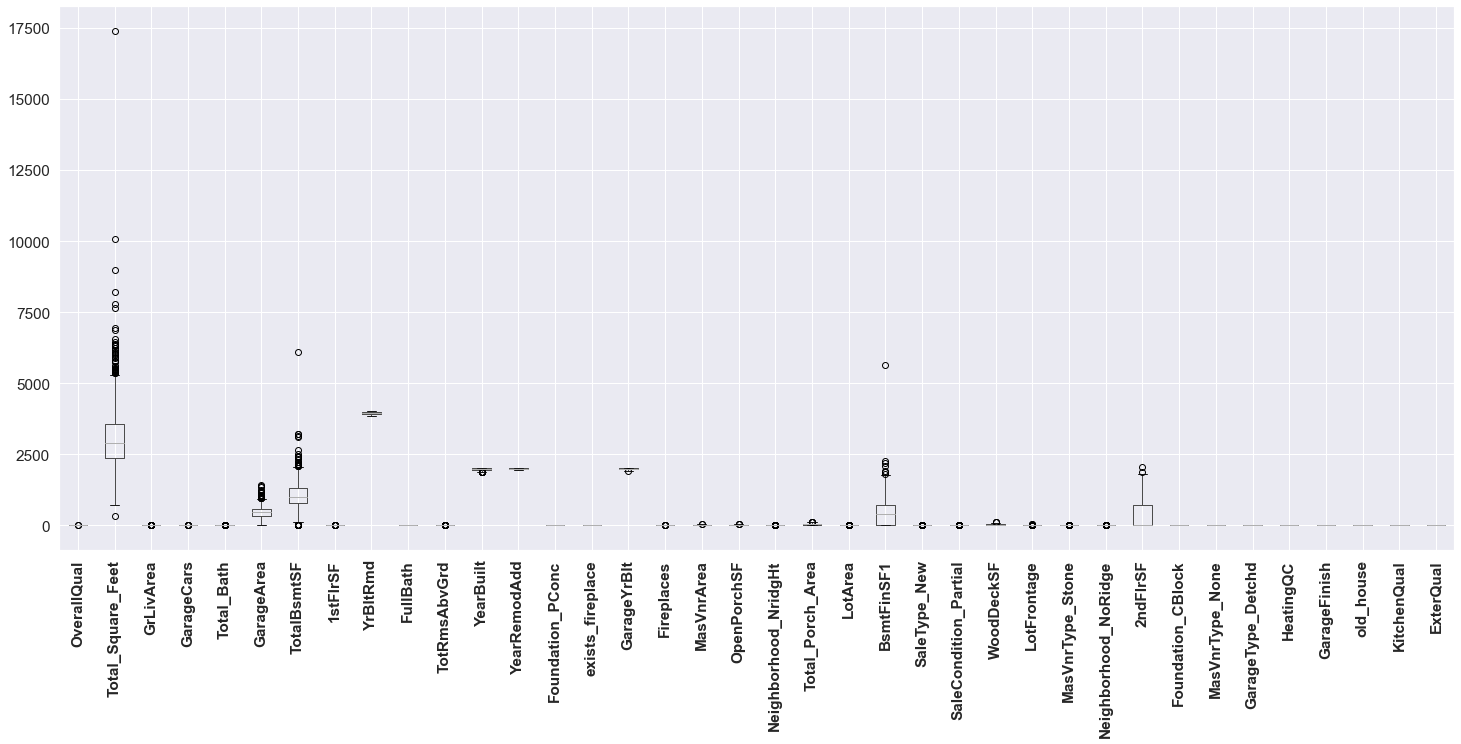

In [28]:
plt.figure(figsize=(25,10))
sb.set(font_scale=1.4)
train.boxplot(column=best_columns)
plt.xticks(weight='bold',rotation=90)

In [29]:
train['SalePrice_Log1p'] = np.log1p(train.SalePrice)

C:\Users\HP\AppData\Local\Temp\ipykernel_14696\3427470557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice_Log1p'] = np.log1p(train.SalePrice)


In [30]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_Log1p
0,1,5,13.668864,13.424522,5.271674,1,3,0.0,7,4,...,0,0,1,0,0,0,0,1,0,12.247699
1,2,0,15.311586,13.694528,5.271674,1,3,0.0,6,7,...,0,0,1,0,0,0,0,1,0,12.109016
2,3,5,14.011693,14.034135,5.271674,1,0,0.0,7,4,...,0,0,1,0,0,0,0,1,0,12.317171
3,4,6,13.079139,13.683422,5.271674,1,0,0.0,7,4,...,0,0,1,1,0,0,0,0,0,11.849405
4,5,5,15.722536,14.550144,5.271674,1,0,0.0,8,4,...,0,0,1,0,0,0,0,1,0,12.429220


In [31]:
print(min(train['SalePrice_Log1p']))
print(max(train['SalePrice_Log1p']))

10.460270761075149
13.534474352733596


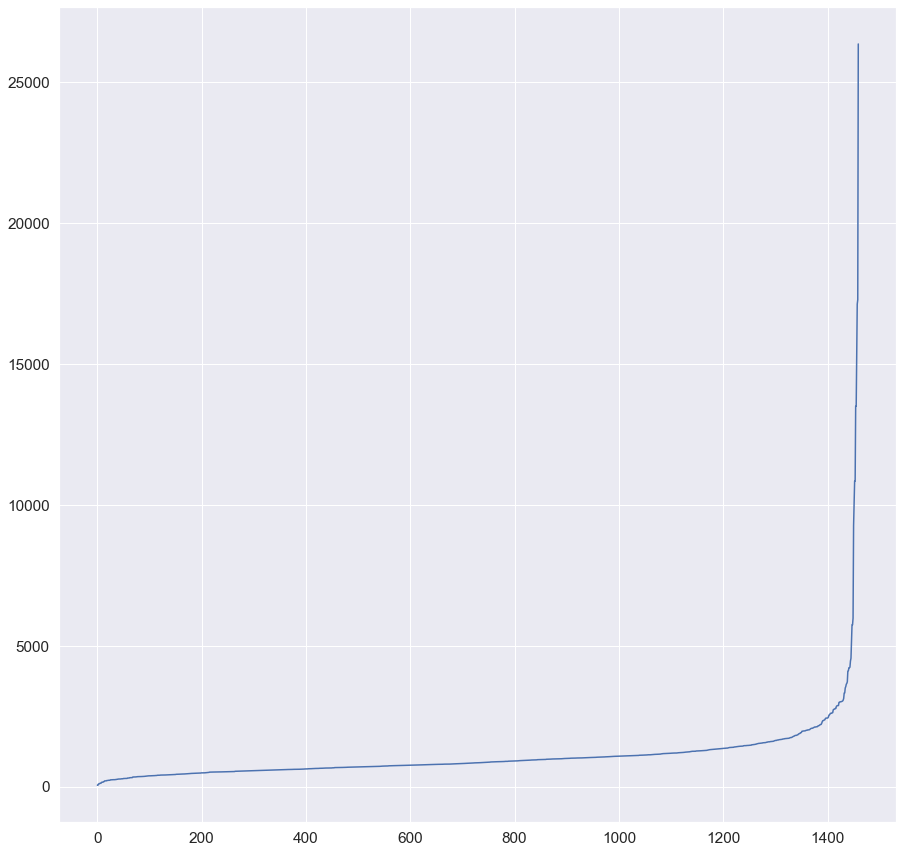

In [32]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train)
distances, indices = nbrs.kneighbors(train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,15))
plt.plot(distances)

In [33]:
dbscan = DBSCAN(eps=1400, min_samples=20).fit(train_pca)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels=dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

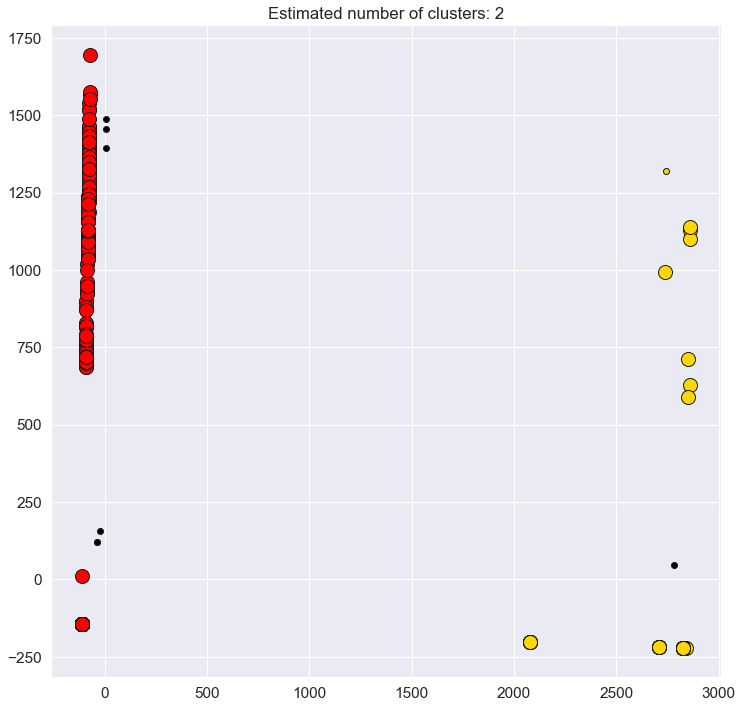

In [34]:
unique_labels = set(labels)
plt.figure(figsize=(12,12))
colors = [plt.cm.prism(each)  for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = train_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = train_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [35]:
labels=pd.DataFrame(labels,columns=['Classes'])
print(labels[labels['Classes']==-1])

      Classes
197        -1
810        -1
1170       -1
1182       -1
1298       -1
1386       -1
1423       -1


In [36]:
train=pd.concat([train,labels],axis=1)

In [37]:
train[train.Classes==-1]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_Log1p,Classes
197,198,7,23.181519,15.851263,5.271674,1,3,0.0,8,3,...,0,1,1,0,0,0,0,0,12.367345,-1
810,811,0,15.102190,13.811205,5.271674,1,3,0.0,6,5,...,0,1,0,0,0,0,1,0,12.106258,-1
1170,1171,8,14.890046,13.755758,5.271674,1,3,0.0,6,5,...,0,1,0,0,0,0,1,0,12.049425,-1
1182,1183,5,22.181021,14.751523,5.271674,1,0,0.0,10,4,...,0,1,1,0,0,0,0,0,13.521141,-1
1298,1299,5,31.456866,18.058233,5.271674,1,2,0.0,10,4,...,0,0,0,0,0,0,0,1,11.982935,-1
1386,1387,5,15.311586,14.898481,5.271674,1,0,0.0,7,4,...,0,1,0,0,0,0,1,0,12.429220,-1
1423,1424,8,14.457069,15.268763,5.271674,1,0,0.0,6,6,...,0,1,0,0,1,0,0,0,12.524421,-1


In [38]:
train.drop([197,810,1170,1182,1298,1386,1423],axis=0,inplace=True)

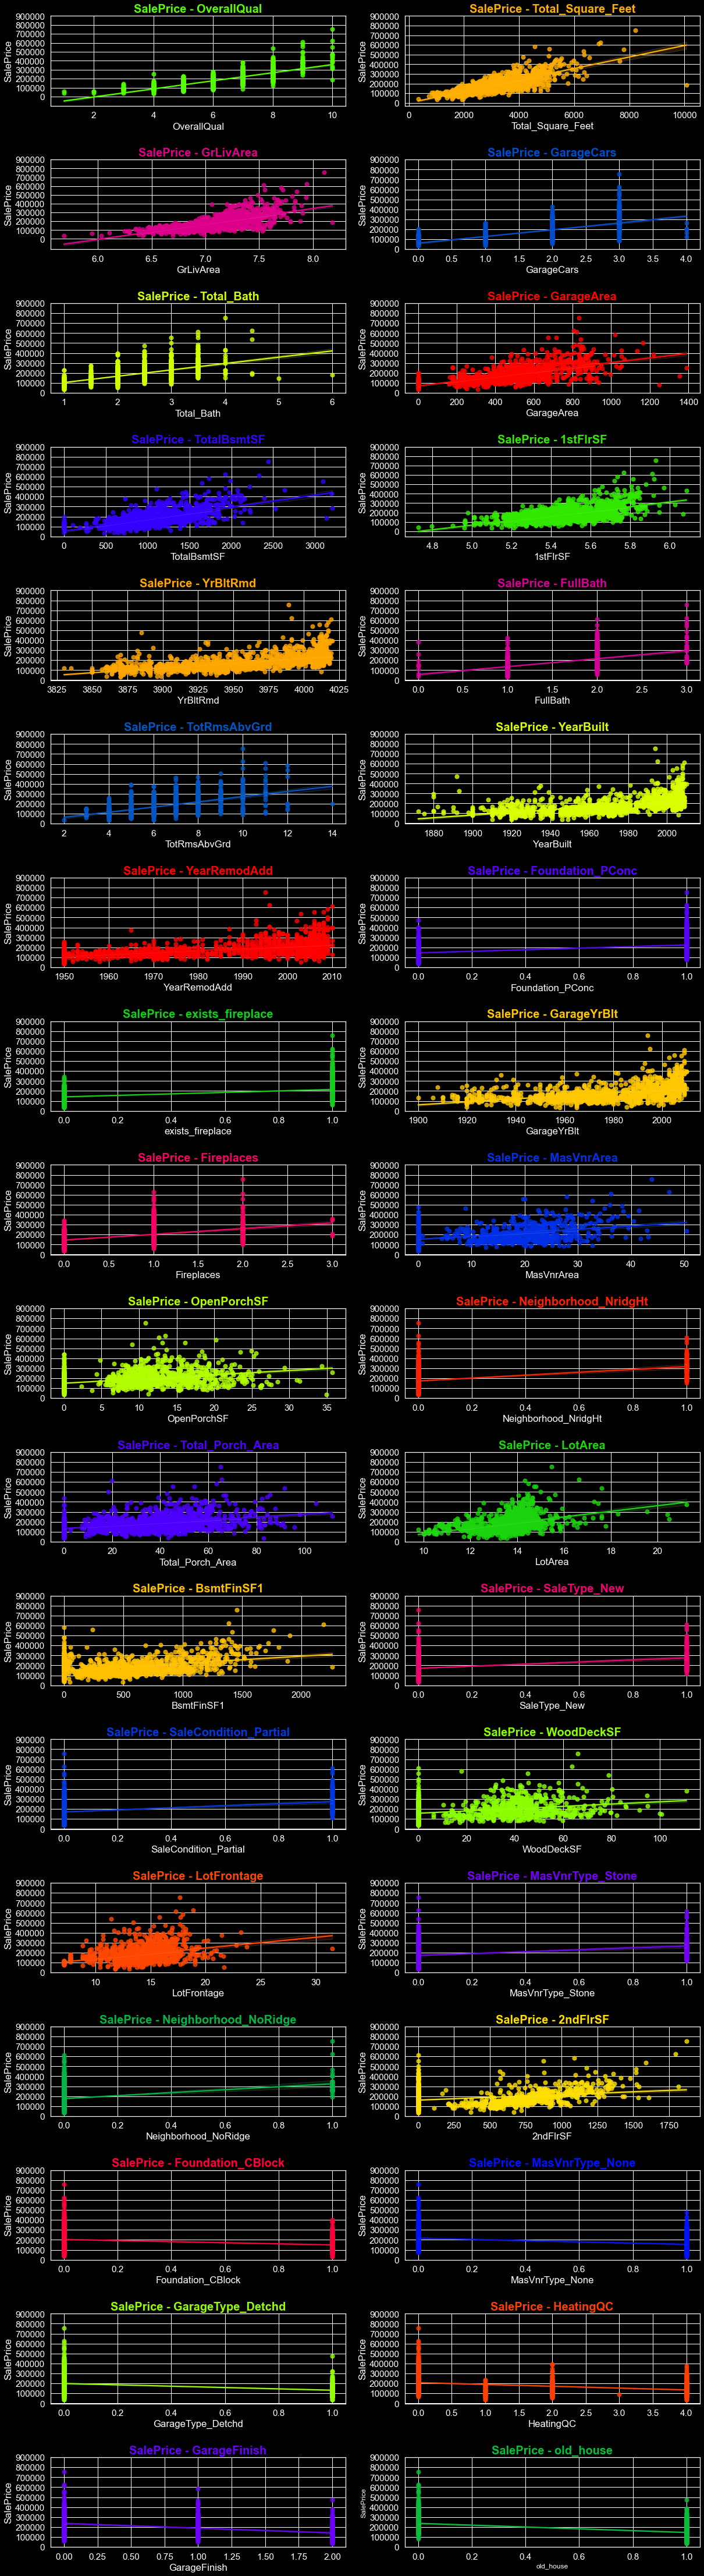

In [39]:
plt.style.use('dark_background')
fig, axes = plt.subplots(18, 2,figsize=(20,80))
fig.subplots_adjust(hspace=0.6)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sb.regplot(x=train[i], y=train["SalePrice"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.8},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),color=color,fontweight='bold',size=20)

In [40]:
train = train[train.GarageArea * train.GarageCars < 3700]
train = train[(train.FullBath + (train.HalfBath*0.5) + train.BsmtFullBath + (train.BsmtHalfBath*0.5))<5]

In [41]:
len(train)

1447

In [42]:
train.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
Street                   0
Alley                    0
LotShape                 0
LandSlope                0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
CentralAir               0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
T

In [43]:
test.isnull().sum()

Id                          0
MSSubClass                  0
LotFrontage                 0
LotArea                     0
Street                      0
Alley                       0
LotShape                    0
LandSlope                   0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinType1                0
BsmtFinSF1                  0
BsmtFinType2                0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
HeatingQC                   0
CentralAir                  0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath  

In [44]:
del test['SalePrice']

In [45]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_Log1p,Classes
0,1,5,13.668864,13.424522,5.271674,1,3,0.0,7,4,...,0,1,0,0,0,0,1,0,12.247699,0
1,2,0,15.311586,13.694528,5.271674,1,3,0.0,6,7,...,0,1,0,0,0,0,1,0,12.109016,0
2,3,5,14.011693,14.034135,5.271674,1,0,0.0,7,4,...,0,1,0,0,0,0,1,0,12.317171,0
3,4,6,13.079139,13.683422,5.271674,1,0,0.0,7,4,...,0,1,1,0,0,0,0,0,11.849405,0
4,5,5,15.722536,14.550144,5.271674,1,0,0.0,8,4,...,0,1,0,0,0,0,1,0,12.429220,0


In [46]:
X=train.drop(['SalePrice','SalePrice_Log1p','Classes'],axis=1)
y=train.SalePrice_Log1p

In [47]:
X1=train[['OverallQual','Total_Square_Feet','GrLivArea','GarageCars','Total_Bath','GarageArea','TotalBsmtSF','1stFlrSF','YrBltRmd','FullBath',]]
y1=train['SalePrice_Log1p']
test=train_test[1460:2919]
test1=test[['OverallQual','Total_Square_Feet','GrLivArea','GarageCars','Total_Bath','GarageArea','TotalBsmtSF','1stFlrSF','YrBltRmd','FullBath',]]

In [48]:
X1.head()

,OverallQual,Total_Square_Feet,GrLivArea,GarageCars,Total_Bath,GarageArea,TotalBsmtSF,1stFlrSF,YrBltRmd,FullBath
0,7,3272.0,7.234117,2.0,3.5,548.0,856.0,5.318378,4006,2
1,6,3502.0,6.947213,2.0,2.5,460.0,1262.0,5.550625,3952,2
2,7,3192.0,7.275134,2.0,3.5,608.0,920.0,5.362014,4003,2
3,7,2689.0,7.237971,3.0,2.0,642.0,756.0,5.388290,3885,1
4,8,3998.0,7.470743,3.0,3.5,836.0,1145.0,5.493030,4000,2


In [49]:
def overfit_reducer(df):

    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.9:
            overfit.append(i)
    overfit = list(overfit)
    return overfit
overfitted_features = overfit_reducer(X)
overfitted_features = overfit_reducer(X1)

In [50]:
del test['SalePrice']
print(X.shape)
print(test.shape)
print(X1.shape)
print(test1.shape)

(1447, 231)
(1459, 231)
(1447, 10)
(1459, 10)


In [51]:
X.drop(overfitted_features,axis=1,inplace=True)
X1.drop(overfitted_features,axis=1,inplace=True)
test.drop(overfitted_features,axis=1,inplace=True)
test1.drop(overfitted_features,axis=1,inplace=True)
print('X.shape',X.shape)
print('test.shape',test.shape)

X.shape (1447, 231)
test.shape (1459, 231)


C:\Users\HP\AppData\Local\Temp\ipykernel_14696\2415861720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.drop(overfitted_features,axis=1,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14696\2415861720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(overfitted_features,axis=1,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14696\2415861720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.dro

In [52]:
std_scaler=StandardScaler()
rbst_scaler=RobustScaler()
power_transformer=PowerTransformer()
X_std=std_scaler.fit_transform(X)
X_rbst=rbst_scaler.fit_transform(X)
X_pwr=power_transformer.fit_transform(X)

test_std=std_scaler.transform(test)
test_rbst=rbst_scaler.transform(test)
test_pwr=power_transformer.transform(test)

X_std1=std_scaler.fit_transform(X1)
test_std1=std_scaler.transform(test1)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=52)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (1157, 231)
X_test Shape : (290, 231)
y_train Shape : (1157,)
y_test Shape : (290,)


In [54]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_std1,y,test_size=0.2,random_state=52)

In [55]:
lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
y_head=lgb_regressor.predict(X_test)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
----------LGBM----------
R square Accuracy:  0.9122622585677116
Mean Absolute Error Accuracy:  0.08142872373212515
Mean Squared Error Accuracy:  0.014761394932634807


In [56]:
lgb_regressor1=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor1.fit(X_train1, y_train1)
y_head1=lgb_regressor1.predict(X_test1)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test1,y_head1))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test1,y_head1))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test1,y_head1))

[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
----------LGBM----------
R square Accuracy:  0.8669113910984667
Mean Absolute Error Accuracy:  0.10714263358994086
Mean Squared Error Accuracy:  0.02239143024380981


In [57]:
import pickle
pickle_out = open("regressor.pkl","wb")
pickle.dump(lgb_regressor1, pickle_out)
pickle_out.close()

In [58]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)
print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------GBR----------
R square Accuracy:  0.9134677356359314
Mean Absolute Error Accuracy:  0.08012967160639571
Mean Squared Error Accuracy:  0.014558580011761088


In [59]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train, y_train)
y_head=ridgecv_reg.predict(X_test)
print('-'*10+'RidgeCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------RidgeCV----------
R square Accuracy:  0.907906112416097
Mean Absolute Error Accuracy:  0.08457285654732154
Mean Squared Error Accuracy:  0.015494292687677711


In [60]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

lassocv_reg= make_pipeline(LassoCV(alphas=alphas, cv=kfolds))
lassocv_reg.fit(X_train, y_train)
y_head=lassocv_reg.predict(X_test)
print('-'*10+'LassoCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.772152612677827, tolerance: 0.015815225544637445
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9078267675176765, tolerance: 0.015815225544637445
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9926201304404474, tolerance: 0.015815225544637445
  model = cd_fast.enet_coordinate_descent_gram(
c:

----------LassoCV----------
R square Accuracy:  0.9079099810061144
Mean Absolute Error Accuracy:  0.08459174150918072
Mean Squared Error Accuracy:  0.015493641818574561


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.261e+00, tolerance: 1.803e-02
  model = cd_fast.enet_coordinate_descent(


In [61]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
l1ratio=[0.87, 0.9,0.92, 0.95,0.97, 0.99, 1]

elasticv_reg= make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))
elasticv_reg.fit(X_train, y_train)
y_head=elasticv_reg.predict(X_test)
print('-'*10+'ElasticNetCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023441320429159695, tolerance: 0.015815225544637445
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025137295705448537, tolerance: 0.015815225544637445
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026422526280753367, tolerance: 0.015815225544637445
  model = cd_fast.enet_coordinate_descent_g

----------ElasticNetCV----------
R square Accuracy:  0.9185345191443897
Mean Absolute Error Accuracy:  0.07983923777560864
Mean Squared Error Accuracy:  0.013706121409732515


In [62]:
estimators = [('lgbm', lgb_regressor),
              ('gbr', gb_reg),   
              ('lasso', lassocv_reg),   
              ('ridge', ridgecv_reg),   
              ('elasticnet', elasticv_reg)]

stack_reg=StackingRegressor(estimators=estimators,final_estimator=ExtraTreesRegressor(n_estimators=50),n_jobs=-1)
stack_reg.fit(X_train, y_train)
y_head=stack_reg.predict(X_test)
print('-'*10+'StackingRegressor'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------StackingRegressor----------
R square Accuracy:  0.9185011660261111
Mean Absolute Error Accuracy:  0.08266928773583439
Mean Squared Error Accuracy:  0.013711732889388904


In [63]:
y_head=pd.DataFrame(y_head,columns=['Predict'])
y_test.reset_index(drop=True,inplace=True)
y_test_y_head=pd.concat([y_test,y_head],axis=1)
y_test_y_head.head()

,SalePrice_Log1p,Predict
0,12.072547,12.198256
1,11.767575,12.081362
2,11.681832,11.679693
3,12.354497,12.404144
4,12.013101,11.940165


In [64]:
test_pred_lgb=lgb_regressor.predict(test_pwr)
test_pred_gb=gb_reg.predict(test_pwr)
test_pred_elastic=elasticv_reg.predict(test_pwr)
test_pred_ridge=ridgecv_reg.predict(test_pwr)
test_pred_lasso=lassocv_reg.predict(test_pwr)
test_pred_stack=stack_reg.predict(test_pwr)

In [65]:
test_pred_lgb=pd.DataFrame(test_pred_lgb,columns=['SalePrice'])
test_pred_gb=pd.DataFrame(test_pred_gb,columns=['SalePrice'])
test_pred_elastic=pd.DataFrame(test_pred_elastic,columns=['SalePrice'])
test_pred_ridge=pd.DataFrame(test_pred_ridge,columns=['SalePrice'])
test_pred_lasso=pd.DataFrame(test_pred_lasso,columns=['SalePrice'])
test_pred_stack=pd.DataFrame(test_pred_stack,columns=['SalePrice'])

In [66]:
test_pred_lgb.SalePrice =np.floor(np.expm1(test_pred_lgb.SalePrice))
test_pred_gb.SalePrice =np.floor(np.expm1(test_pred_gb.SalePrice))
test_pred_elastic.SalePrice =np.floor(np.expm1(test_pred_elastic.SalePrice))
test_pred_ridge.SalePrice =np.floor(np.expm1(test_pred_ridge.SalePrice))
test_pred_lasso.SalePrice =np.floor(np.expm1(test_pred_lasso.SalePrice))
test_pred_stack.SalePrice =np.floor(np.expm1(test_pred_stack.SalePrice))

In [67]:
final_pred=(test_pred_stack*0.1665)+(test_pred_lgb*0.678)+(test_pred_ridge*0.1665)
final_pred.head()

,SalePrice
0,132537.9615
1,162648.6420
2,188434.5285
3,203688.3270
4,188616.4005


In [68]:
#sample_sub=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [69]:
sample_sub['SalePrice']=final_pred

NameError: name 'sample_sub' is not defined

In [ ]:
sample_sub.head()

,Id,SalePrice
0,1461,132198.1350
1,1462,160437.5220
2,1463,188325.3045
3,1464,204504.5100
4,1465,188014.5030


In [ ]:
sample_sub.to_csv('Submission.csv',index=False)

In [ ]:
import pickle
pickle_out = open("regressor.pkl","wb")
pickle.dump(lassocv_reg, pickle_out)
pickle_out.close()